In [45]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace
from inclearn.models.icarl import ICarl
import hiddenlayer as hl
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [20]:
ic = ICarl({"convnet": "resnet50"})
ic.freeze_layers(5)
model = ic._network.convnet
x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=False)

#make_dot(model(x), params=dict(model.named_parameters()))
hl.build_graph(model,x)
summary(model, input_size=(3, 224, 224))

Using device: cpu
child  0  was frozen
child  1  was frozen
child  2  was frozen
child  3  was frozen
child  4  was frozen
child  5  was not frozen
child  6  was not frozen
child  7  was not frozen
child  8  was not frozen
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,728
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]           4,096
       BatchNorm2d-6         [-1, 64, 112, 112]             128
              ReLU-7         [-1, 64, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          36,864
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
        

In [33]:
blocks=list(model.children())

In [36]:
type(blocks[0])

torch.nn.modules.conv.Conv2d

In [42]:
parameters = {}
for idx, block in enumerate(blocks):
    parameters[idx] = sum([p.numel() for p in block.parameters()])
total_parameters = sum(parameters.values())

Text(0.5,1,'Percentages of parameters in various blocks')

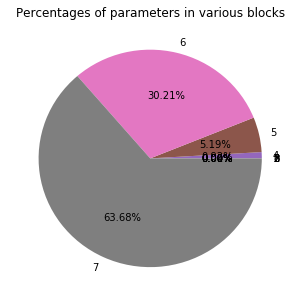

In [58]:
plt.figure(figsize=(5,5))
plt.pie(list(parameters.values()), labels=list(parameters.keys()), autopct='%1.2f%%')
plt.title("Percentages of parameters in various blocks")

In [59]:
parameters

{0: 1728,
 1: 128,
 2: 0,
 3: 0,
 4: 215808,
 5: 1219584,
 6: 7098368,
 7: 14964736,
 8: 0}